# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

## Analysing the Data

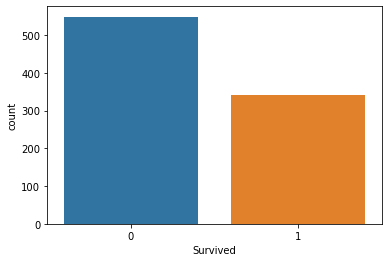

In [4]:
sns.countplot(x='Survived',data=df)
plt.show()

Those who did not survived(more than 500) are greater than those who survived(nearly 300)

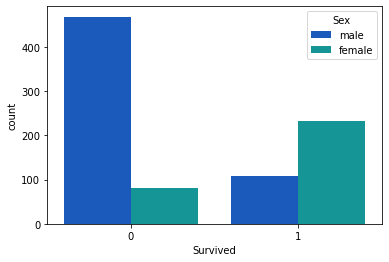

In [5]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='winter')
plt.show()

0 represents not survived and 1 represents for survivers.

Females are thrice more likely to survive than males.

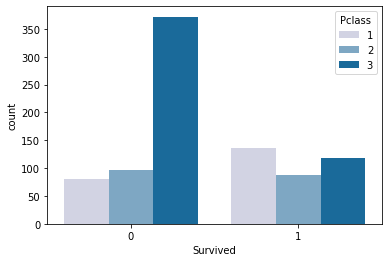

In [6]:
sns.countplot(x='Survived',hue="Pclass",data=df,palette='PuBu')
plt.show()

The passengers who did not survived belong to the 3rd class.

1st class passengers are more likely to survive.

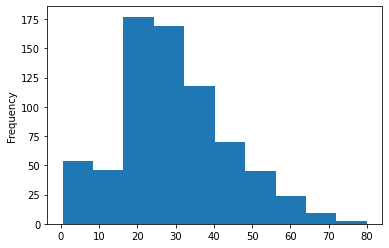

In [7]:
df['Age'].plot.hist()
plt.show()

We notice that highest age group travelling are among the young age between 20-40.

Very few passengers in age group 70-80.

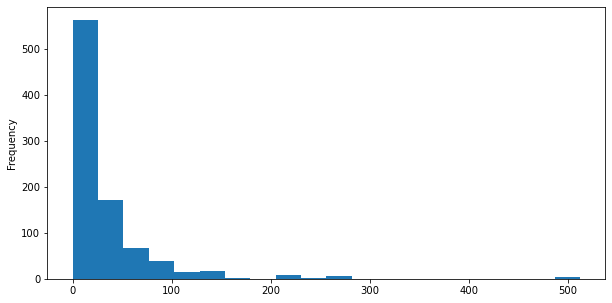

In [8]:
df['Fare'].plot.hist(bins=20,figsize=(10,5))
plt.show()

We observe that most of the tickets bought are under fare 100.

Very few are on the higher side of fare i,e. 220-500 range.

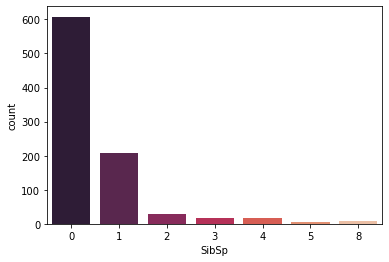

In [9]:
sns.countplot(x='SibSp',data=df,palette='rocket')
plt.show()

We notice that most of the passangers do not have their siblings aboard.

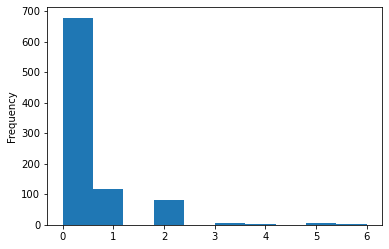

In [10]:
df['Parch'].plot.hist()
plt.show()

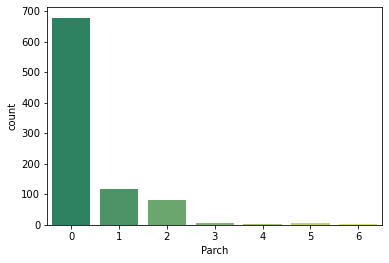

In [11]:
sns.countplot(x='Parch',data=df,palette='summer')
plt.show()

The number of parents and siblings who aboard the ship are less.

## Data Wrangling

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and cabin has most null values, and embarked too has null values.

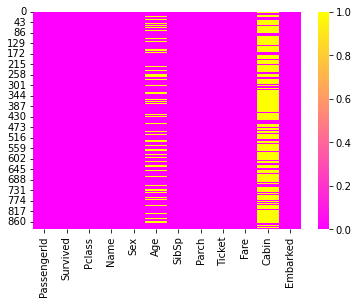

In [13]:
sns.heatmap(df.isnull(),cmap='spring')
plt.show()

Here yellow color is showing the null values,highest in cabin followed by age.

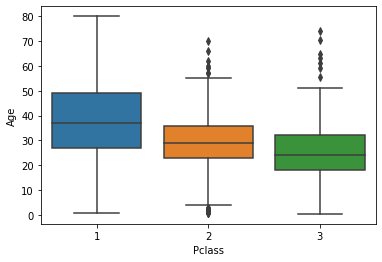

In [14]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

We can observe that older agegroup are travelling more in class 1 and 2 compared to class 3.

The hue parameter determines which column in the dataframe should be used for colour encoding.

we will drop a few columns now.

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.drop('Cabin',axis=1,inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
df.dropna(inplace=True)

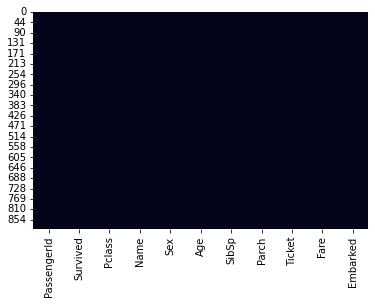

In [19]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

This shows that we don't have any null values, we can also check it:

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df.shape

(712, 11)

We will convert the few columns into categorical data to apply logistic regression.

In [22]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


We have dropped the first column because only one column is sufficient to determine.

The gender of the passenger either will be Male(1) or Female(0).

In [24]:
embark=pd.get_dummies(df['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


C stands for Cherbourg, Q for Queenstown, S for Southhampton.

We can drop any one of the column as we can infer from the two columns itself.

In [25]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [26]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


If both values are 0 then passenger is travelling in 'C' Class.

In [27]:
pcl=pd.get_dummies(df['Pclass'],drop_first=True)

In [28]:
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


Our data is now converted into categorical data.

In [29]:
df=pd.concat([df,sex,embark,pcl],axis=1)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


## Deleting the unwanted columns

In [31]:
df.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [32]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [33]:
df.describe()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,29.642093,0.514045,0.432584,34.567251,0.636236,0.039326,0.778090,0.242978,0.498596
std,0.491139,14.492933,0.930692,0.854181,52.938648,0.481420,0.194506,0.415823,0.429183,0.500350
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,15.645850,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,38.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


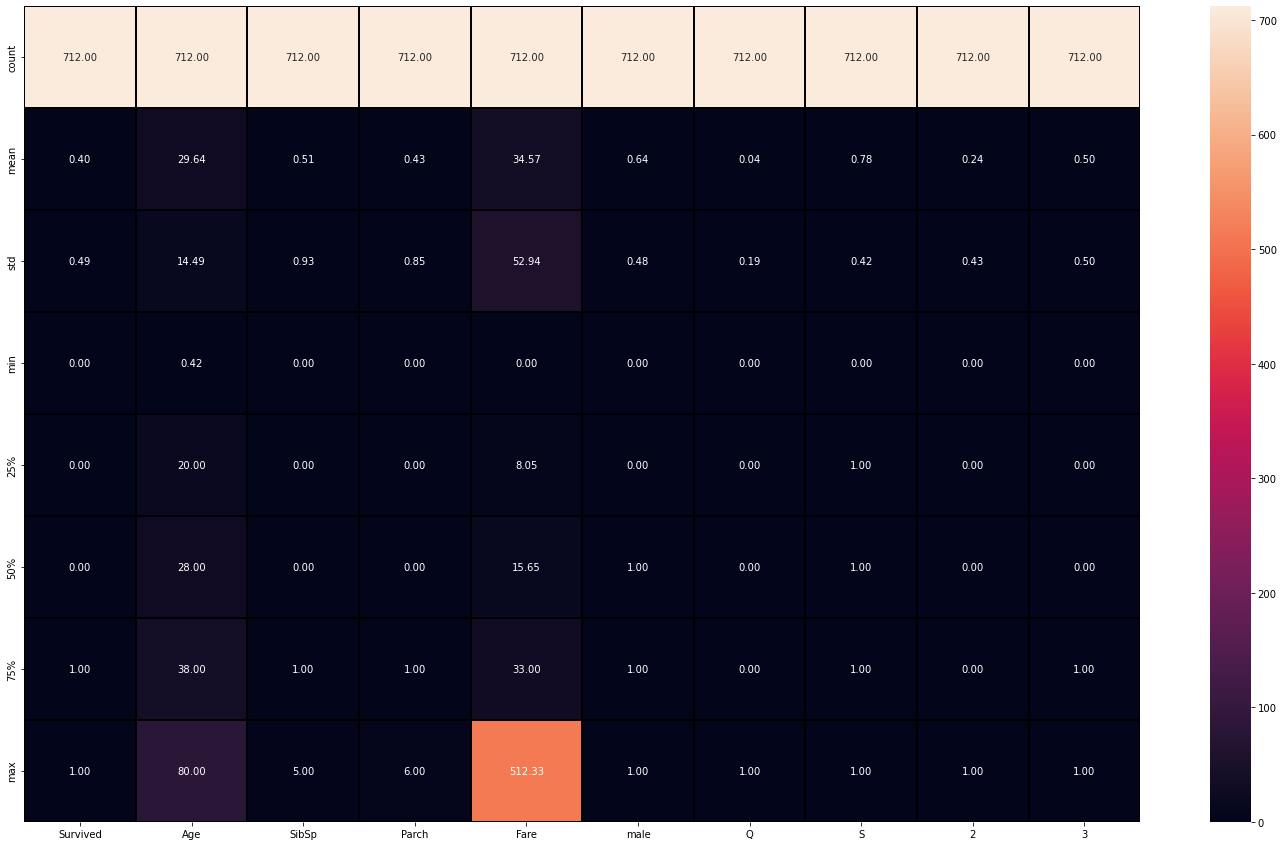

In [34]:
plt.figure(figsize=(25,15))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black')
plt.show()

In [35]:
df.corr()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
Survived,1.000000,-0.082446,-0.015523,0.095265,0.266100,-0.536762,-0.048966,-0.159015,0.086891,-0.335364
Age,-0.082446,1.000000,-0.307351,-0.187896,0.093143,0.099037,-0.021693,-0.025431,0.009214,-0.309944
SibSp,-0.015523,-0.307351,1.000000,0.383338,0.139860,-0.106296,0.051331,0.018968,-0.052570,0.077060
Parch,0.095265,-0.187896,0.383338,1.000000,0.206624,-0.249543,-0.009417,0.013259,-0.018558,0.027750
Fare,0.266100,0.093143,0.139860,0.206624,1.000000,-0.182457,-0.062346,-0.250994,-0.140246,-0.402219
male,-0.536762,0.099037,-0.106296,-0.249543,-0.182457,1.000000,-0.027256,0.109078,-0.075347,0.158446
Q,-0.048966,-0.021693,0.051331,-0.009417,-0.062346,-0.027256,1.000000,-0.378859,-0.080929,0.145087
S,-0.159015,-0.025431,0.018968,0.013259,-0.250994,0.109078,-0.378859,1.000000,0.168577,0.093140
2,0.086891,0.009214,-0.052570,-0.018558,-0.140246,-0.075347,-0.080929,0.168577,1.000000,-0.564948
3,-0.335364,-0.309944,0.077060,0.027750,-0.402219,0.158446,0.145087,0.093140,-0.564948,1.000000


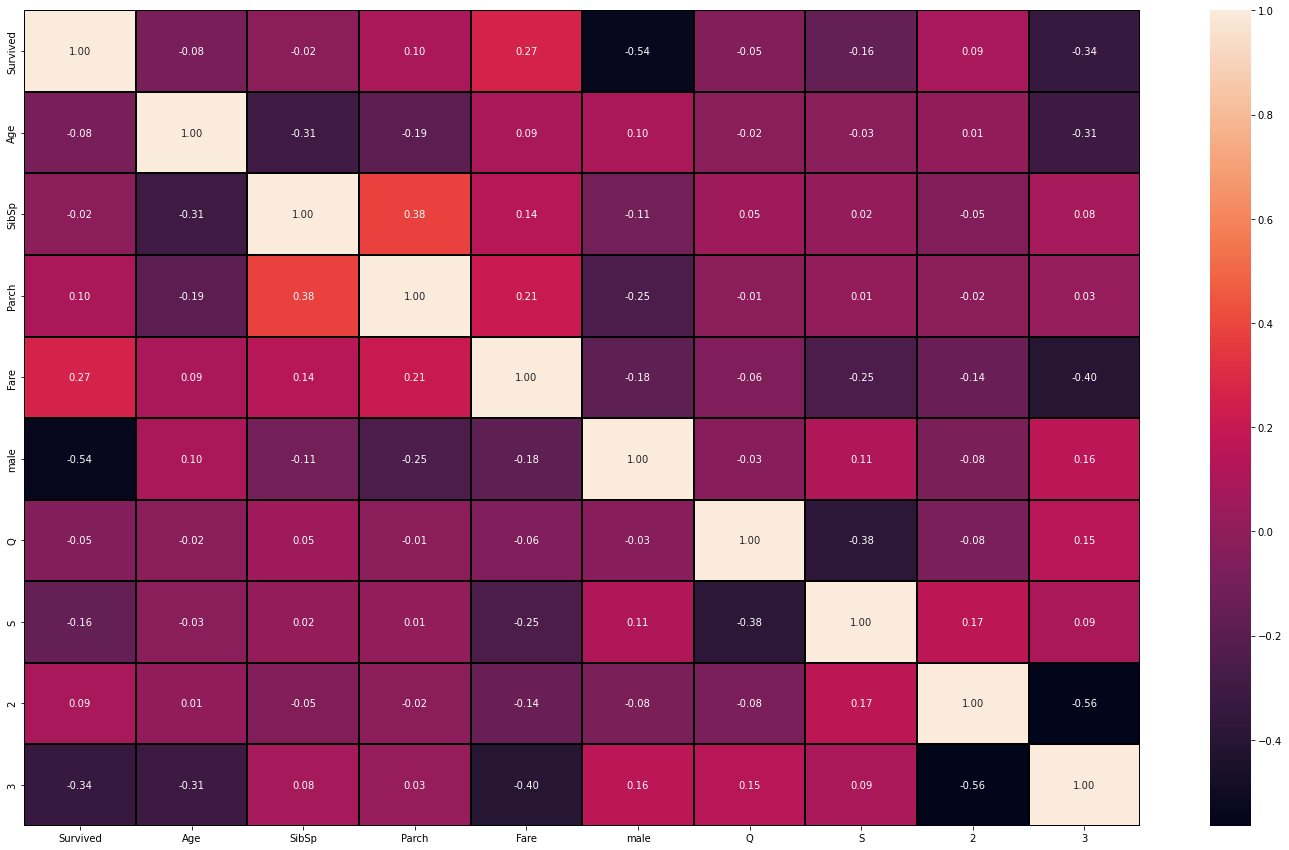

In [36]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black')
plt.show()

## Splitting the dataframe

In [37]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

## Logistic Regression.

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [41]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predlr))
print("Confusion matrix:\n",confusion_matrix(y_test,predlr))
print("Classification report:\n",classification_report(y_test,predlr))

Accuracy score: 0.8170212765957446
Confusion matrix:
 [[123  13]
 [ 30  69]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       136
           1       0.84      0.70      0.76        99

    accuracy                           0.82       235
   macro avg       0.82      0.80      0.81       235
weighted avg       0.82      0.82      0.81       235



In [42]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
SVC=SVC()

RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print("Random Forest Classifier:\n")
print("Accuracy score:",accuracy_score(y_test,predRFC))
print("Confusion matrix:\n",confusion_matrix(y_test,predRFC))
print("Classification report:\n",classification_report(y_test,predRFC))

ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print("Extra Trees Classifier:\n")
print("Accuracy score:",accuracy_score(y_test,predETC))
print("Confusion matrix:\n",confusion_matrix(y_test,predETC))
print("Classification report:\n",classification_report(y_test,predETC))

GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print("Gradient Boosting Classifier:\n")
print("Accuracy score:",accuracy_score(y_test,predGBC))
print("Confusion matrix:\n",confusion_matrix(y_test,predGBC))
print("Classification report:\n",classification_report(y_test,predGBC))

SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print("SVC:\n")
print("Accuracy score:",accuracy_score(y_test,predSVC))
print("Confusion matrix:\n",confusion_matrix(y_test,predSVC))
print("Classification report:\n",classification_report(y_test,predSVC))

Random Forest Classifier:

Accuracy score: 0.8085106382978723
Confusion matrix:
 [[116  20]
 [ 25  74]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       136
           1       0.79      0.75      0.77        99

    accuracy                           0.81       235
   macro avg       0.80      0.80      0.80       235
weighted avg       0.81      0.81      0.81       235

Extra Trees Classifier:

Accuracy score: 0.7957446808510639
Confusion matrix:
 [[113  23]
 [ 25  74]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       136
           1       0.76      0.75      0.76        99

    accuracy                           0.80       235
   macro avg       0.79      0.79      0.79       235
weighted avg       0.80      0.80      0.80       235

Gradient Boosting Classifier:

Accuracy score: 0.8170212765957446
Confusion matrix:
 [[126  

In [43]:
Model=['Logistic regression','Random forest classifier','Extra Tree Classifier','Gradient Boosting Classifier','SVC']
Score=[0.7957446808510639, 0.8,0.7914893617021277, 0.8127659574468085, 0.6851063829787234]

In [44]:
Results=pd.DataFrame({'Model':Model,'Score':Score})
Result=Results.sort_values(by="Score",ascending=False)
Result=Result.set_index('Score')
Result

,Model
Score,
0.812766,Gradient Boosting Classifier
0.800000,Random forest classifier
0.795745,Logistic regression
0.791489,Extra Tree Classifier
0.685106,SVC
